# Libraries importing

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_curve, auc, make_scorer
from keras.utils import to_categorical
from scipy import interp
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import _name_estimators
from sklearn.base import clone
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.estimator_checks import check_estimator

# Load and preprocess data

In [ ]:
""" Mounting the drive to access the data"""

from google.colab import drive
drive.mount('/content/drive')
PROJECT_DATA_DDOS = "/content/drive/MyDrive/final_data.csv"

Mounted at /content/drive


In [ ]:
new_data = pd.read_csv(PROJECT_DATA_DDOS)
data_X = new_data.drop([' Label', 'SimillarHTTP'], axis=1)
data_y = new_data[' Label']

<ipython-input-3-214065f621b3>:1: DtypeWarning: Columns (84) have mixed types. Specify dtype option on import or set low_memory=False.
  new_data = pd.read_csv(PROJECT_DATA_DDOS)


# Data Analysis

## Statistics

In [ ]:
#show the data Features
new_data.columns

Index(['Flow ID', ' Source IP', ' Source Port', ' Destination IP',
       ' Destination Port', ' Protocol', ' Timestamp', ' Flow Duration',
       ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Pa

In [ ]:
#show features type and count
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999999 entries, 0 to 999998
Data columns (total 87 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Flow ID                       999999 non-null  object 
 1    Source IP                    999999 non-null  object 
 2    Source Port                  999999 non-null  int64  
 3    Destination IP               999999 non-null  object 
 4    Destination Port             999999 non-null  int64  
 5    Protocol                     999999 non-null  int64  
 6    Timestamp                    999999 non-null  object 
 7    Flow Duration                999999 non-null  float64
 8    Total Fwd Packets            999999 non-null  float64
 9    Total Backward Packets       999999 non-null  float64
 10  Total Length of Fwd Packets   999999 non-null  float64
 11   Total Length of Bwd Packets  999999 non-null  float64
 12   Fwd Packet Length Max        999999 non-nul

In [ ]:
#show statistics about the data's features
new_data.describe()

,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound
count,999999.000000,999999.000000,999999.000000,9.999990e+05,999999.000000,999999.000000,999999.000000,9.999990e+05,999999.000000,999999.000000,...,9.999990e+05,9.999990e+05,9.999990e+05,9.999990e+05,9.999990e+05,9.999990e+05,9.999990e+05,9.999990e+05,9.999990e+05,999999.000000
mean,30835.769856,29558.875443,14.053057,2.221353e+06,3.680081,1.460602,1091.785473,8.112662e+02,456.454138,427.930356,...,-2.740875e+07,1.423134e+04,1.000615e+04,2.837699e+04,8.244663e+03,7.031495e+05,1.130673e+05,8.237119e+05,5.971208e+05,0.837914
std,24183.234631,20785.343594,4.913883,1.271573e+07,151.206416,19.514219,1935.601667,3.129937e+04,482.826432,471.887593,...,1.684811e+08,2.015616e+05,1.507964e+05,3.558303e+05,1.725453e+05,4.718912e+06,1.090559e+06,5.268761e+06,4.396978e+06,0.368530
min,0.000000,0.000000,0.000000,1.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,-1.408238e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,900.000000,10249.000000,6.000000,1.000000e+00,2.000000,0.000000,88.000000,0.000000e+00,43.000000,6.000000,...,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000
50%,37226.000000,29504.000000,17.000000,2.000000e+00,2.000000,0.000000,754.000000,0.000000e+00,375.000000,330.000000,...,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000
75%,53692.000000,47916.000000,17.000000,9.900000e+01,2.000000,0.000000,1398.000000,0.000000e+00,475.000000,446.000000,...,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000
max,65533.000000,65535.000000,17.000000,1.199975e+08,86772.000000,4632.000000,188320.000000,8.419196e+06,3617.000000,2131.000000,...,1.480000e+03,1.231520e+07,9.090875e+06,2.511954e+07,1.231520e+07,1.031116e+08,6.188006e+07,1.031116e+08,1.031116e+08,1.000000


In [ ]:
#show the first 5 rows
new_data.head()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,172.16.0.5-192.168.50.4-5149-39433-17,172.16.0.5,5149,192.168.50.4,39433,17,2018-11-03 10:34:55.014697,49.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,MSSQL
1,172.16.0.5-192.168.50.4-61791-46546-17,172.16.0.5,61791,192.168.50.4,46546,17,2018-11-03 10:39:01.693256,1.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,MSSQL
2,172.16.0.5-192.168.50.4-61850-4222-17,172.16.0.5,61850,192.168.50.4,4222,17,2018-11-03 10:40:43.876989,1.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,MSSQL
3,172.16.0.5-192.168.50.4-35881-23108-17,172.16.0.5,35881,192.168.50.4,23108,17,2018-11-03 10:35:02.942429,1.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,MSSQL
4,172.16.0.5-192.168.50.4-7691-22489-17,172.16.0.5,7691,192.168.50.4,22489,17,2018-11-03 10:34:49.786640,1.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,MSSQL


## Feature Distributions

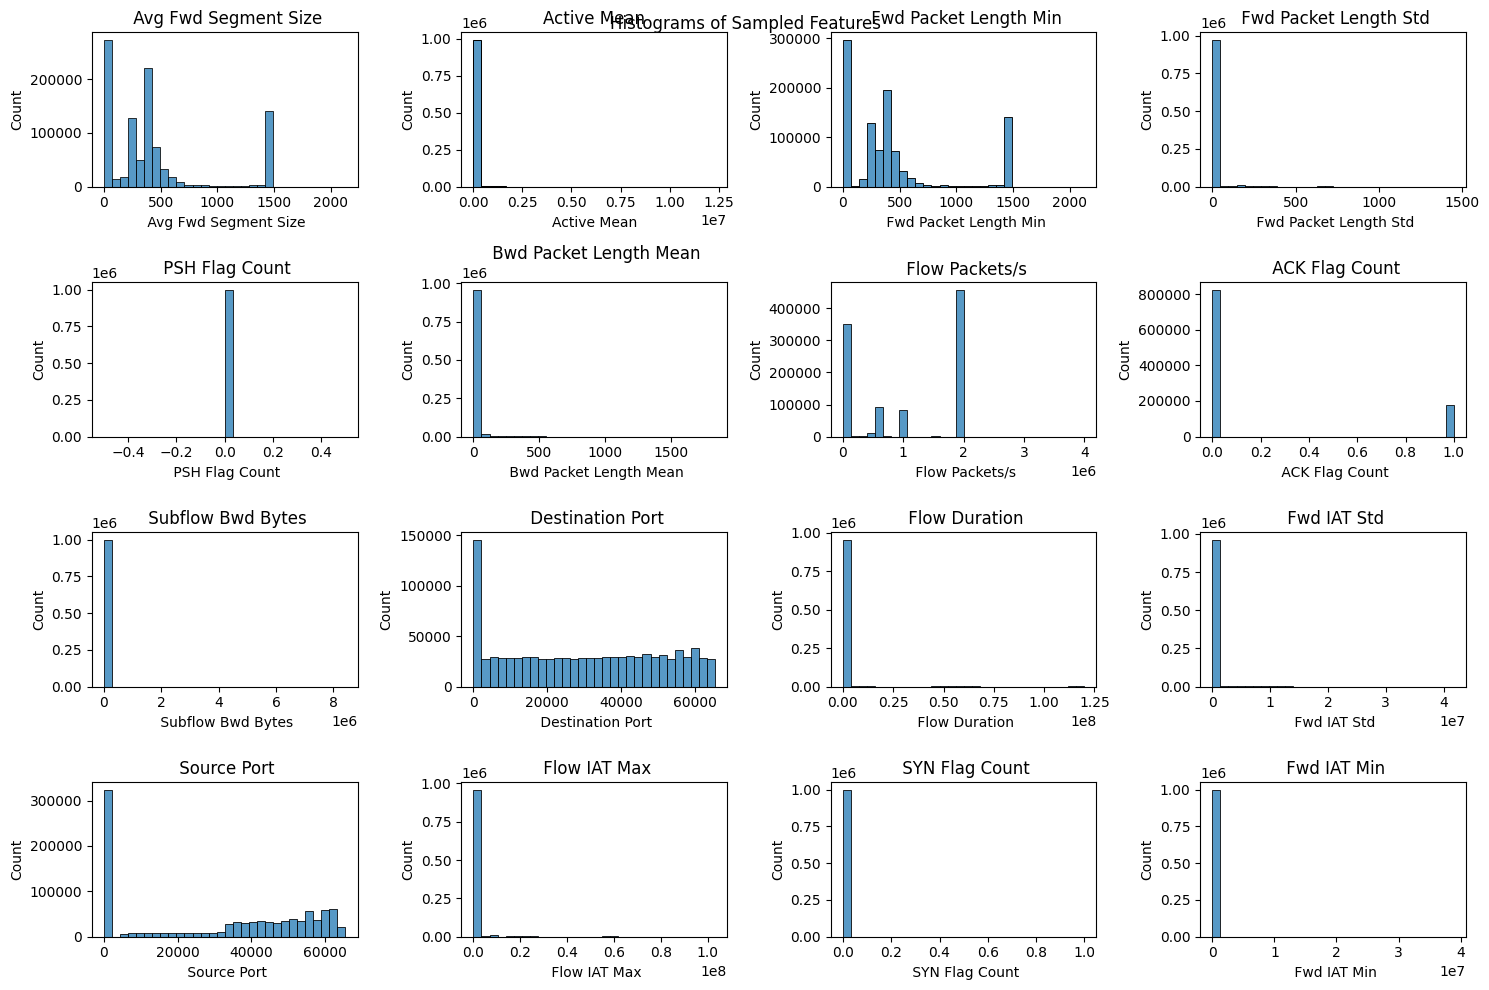

In [ ]:
#show histograms for the features to provide insights about the charactristics and distrbution of the data
num_features = data_X.shape[1]  # Total number of features
num_samples = 16  # Number of features to randomly sample for histograms

# Randomly sample a subset of features
sampled_features = random.sample(list(data_X.columns), num_samples)

# Plot histograms of the sampled features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(sampled_features, 1):
    plt.subplot(4, 4, i)  # Adjust for a 4x4 grid
    sns.histplot(data_X[feature], kde=False, bins=30)
    plt.title(feature)
    plt.tight_layout()
plt.suptitle('Histograms of Sampled Features')
plt.show()

## Correlation Heatmap

<ipython-input-9-8c66c8a1827e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data_X.corr()


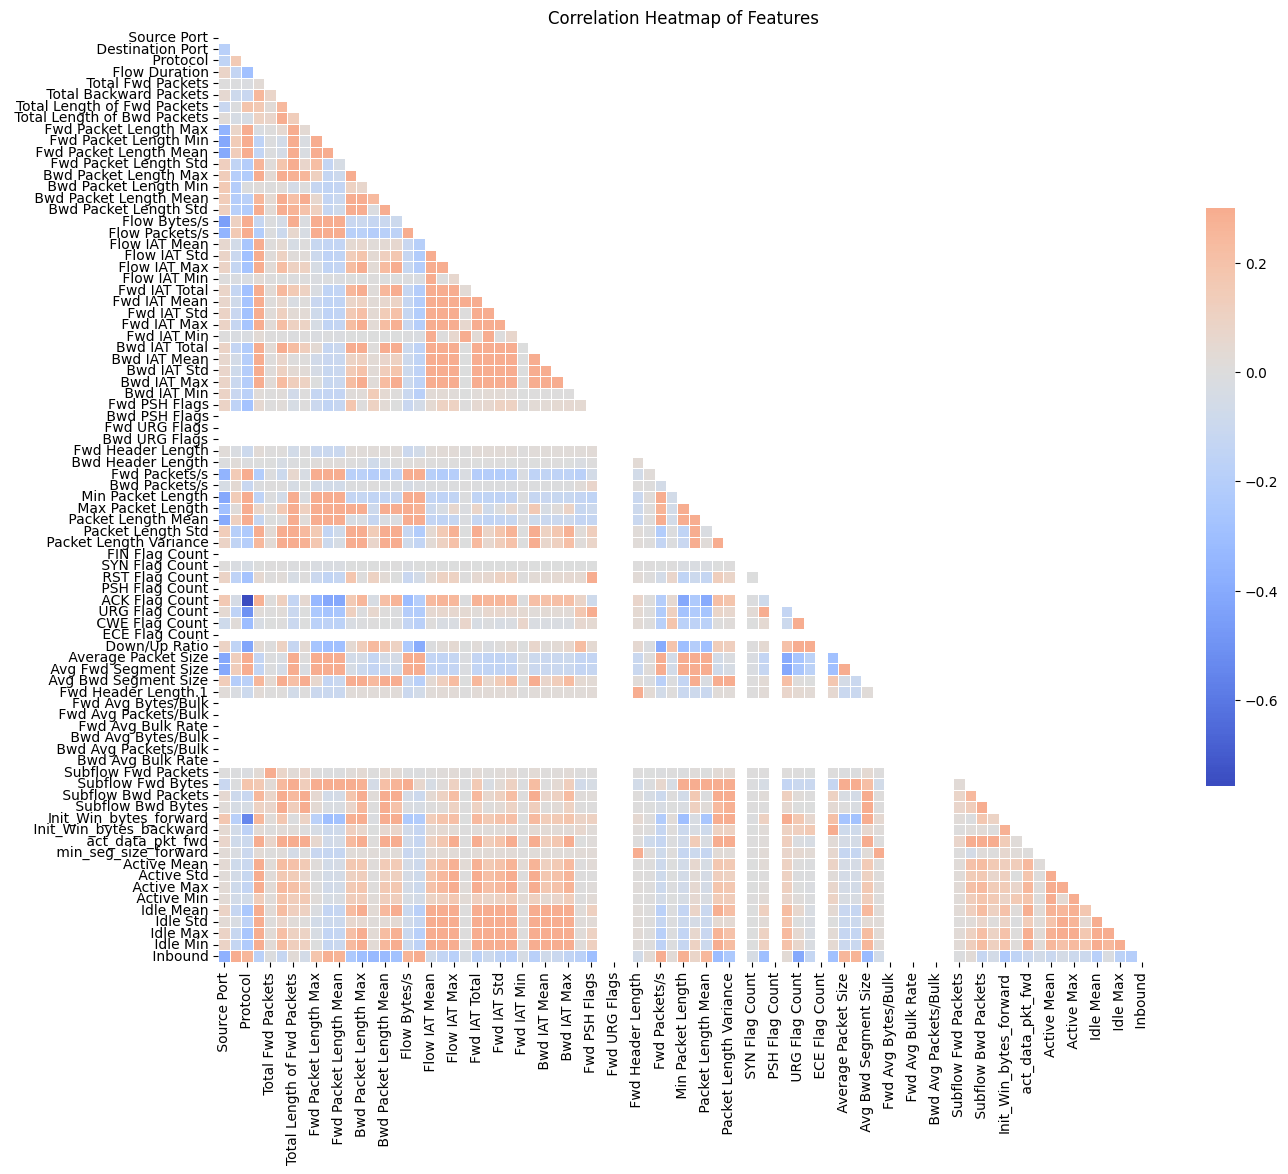

In [ ]:
#correlation heatmap to provide insights into the relationship betweem the features
corr = data_X.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(15, 15))
sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Heatmap of Features')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

## Pairplot for Selected Features

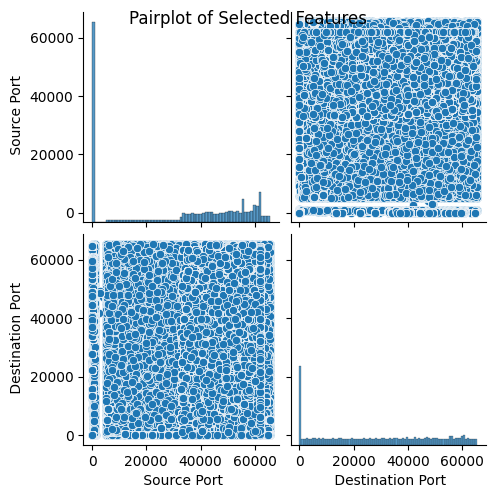

In [ ]:
#scatterplots to shows the relationships between pairs of features
selected_features = data_X.columns[:5]
sns.pairplot(data_X[selected_features])
plt.suptitle('Pairplot of Selected Features')
plt.show()

## Boxplot for Features Grouped by Target Variable

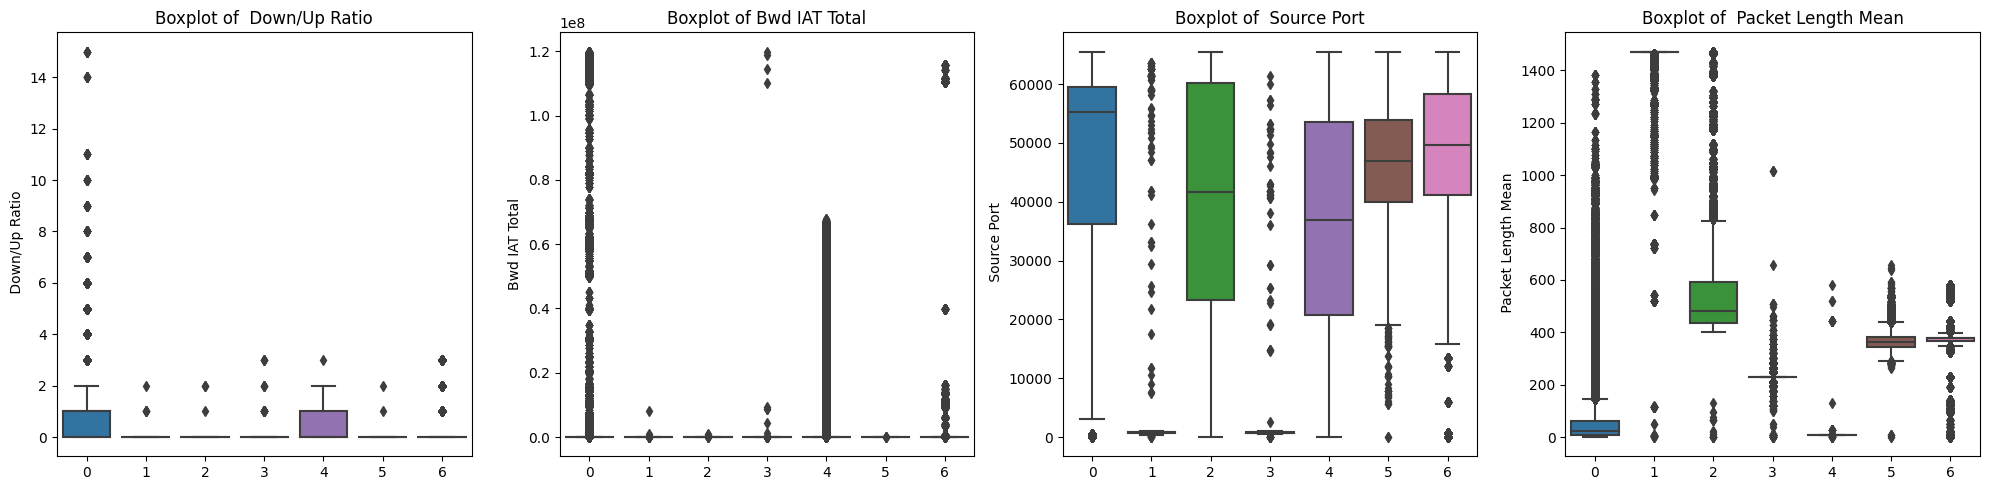

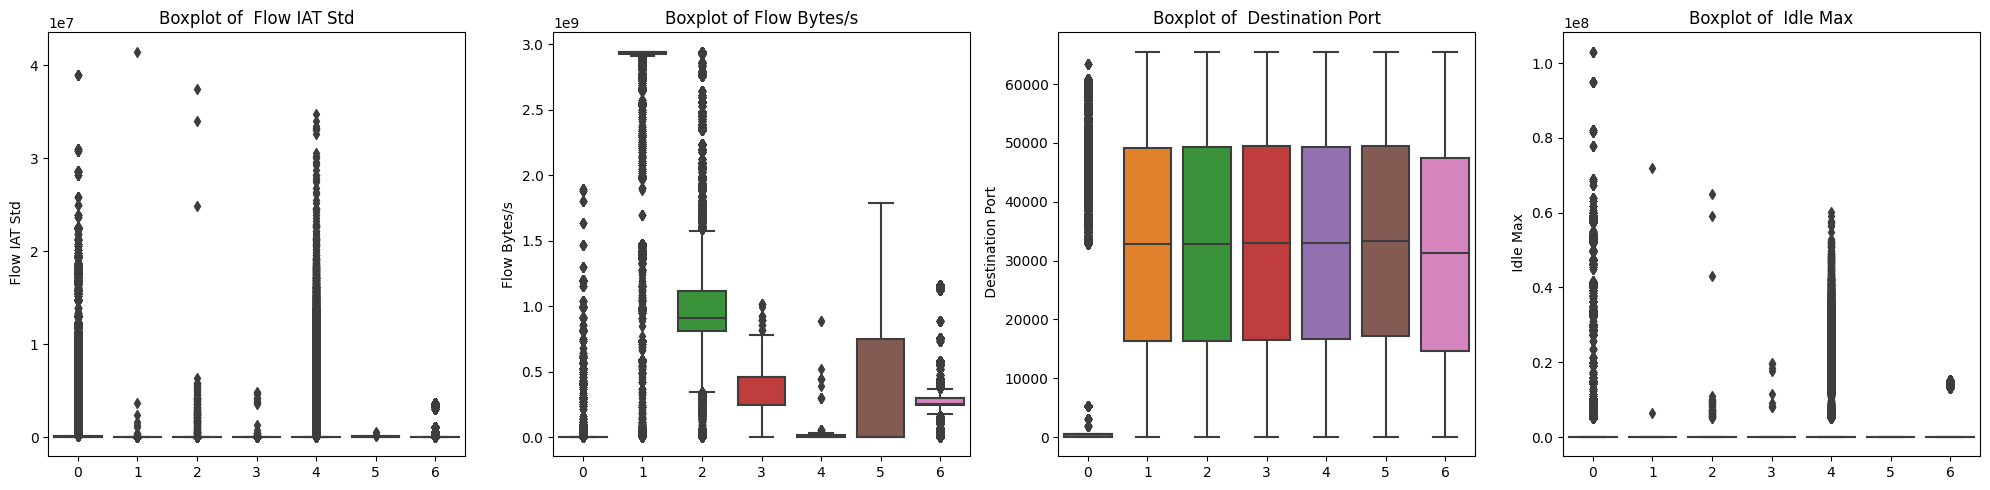

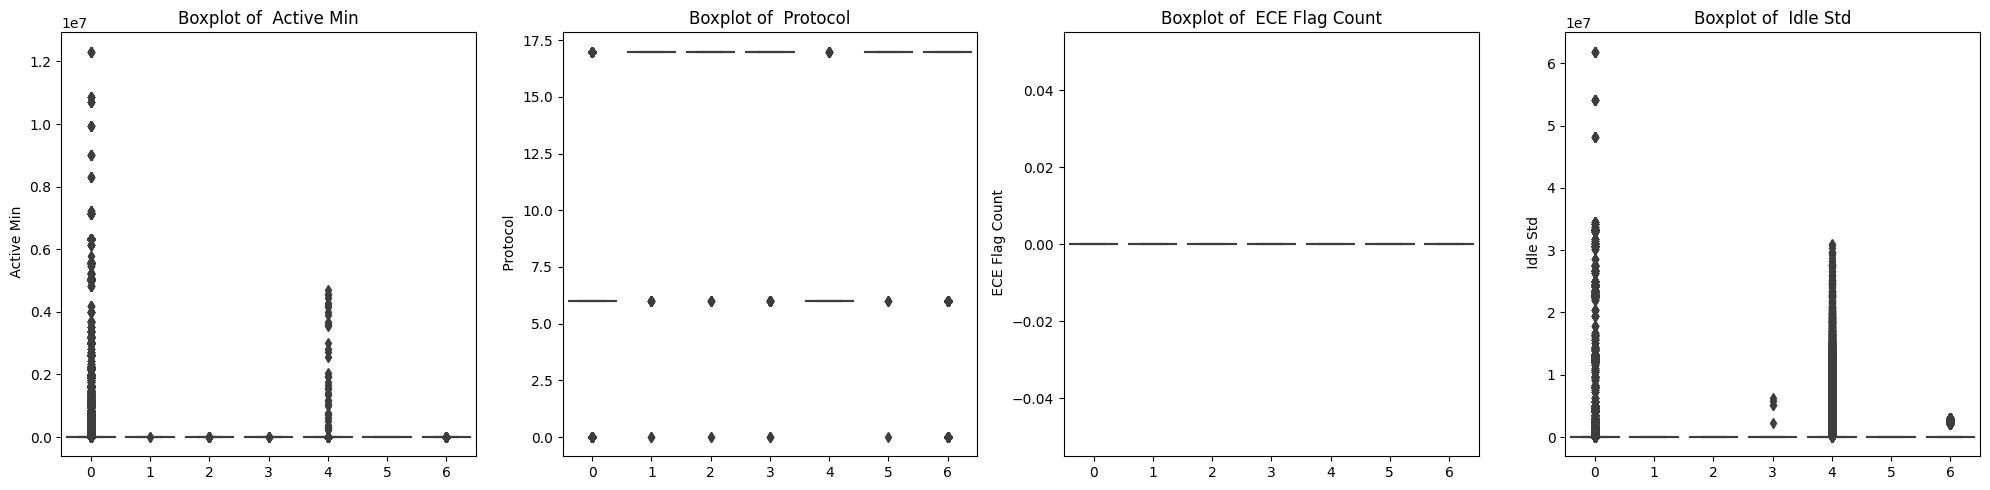

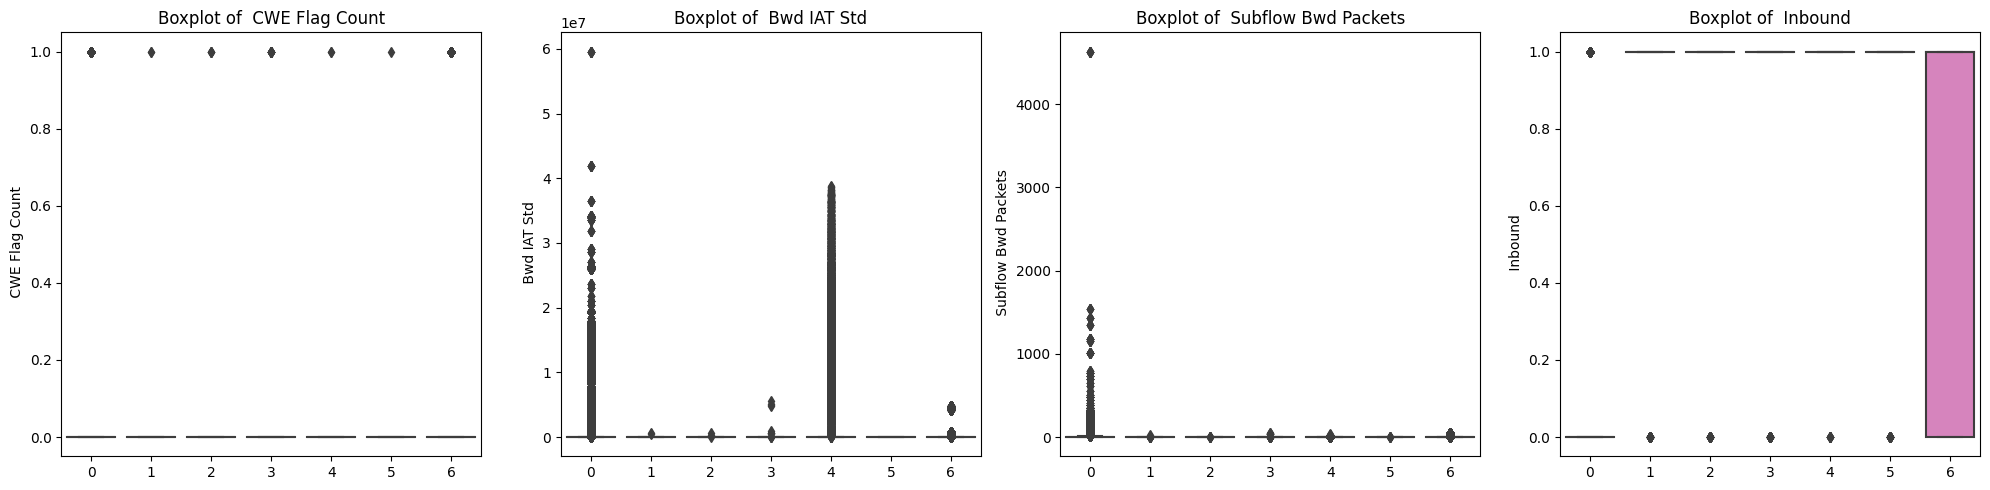

In [ ]:
# Ensure data_y is numeric
if not np.issubdtype(data_y.dtype, np.number):
    data_y = data_y.astype('category').cat.codes

# Parameters for sampling
num_cols = 4  # Reduced number of columns in the plot
num_samples = 16  # Reduced number of features to randomly sample

# Randomly sample a subset of features
sampled_features = random.sample(list(data_X.columns), num_samples)

# Number of rows for the subplot grid
num_rows = len(sampled_features) // num_cols + (len(sampled_features) % num_cols > 0)

# Iterate over the sampled features and create boxplots
for i in range(num_rows):
    fig, axs = plt.subplots(1, num_cols, figsize=(20, 5))  # Reduced figure size
    for j in range(num_cols):
        feature_index = i * num_cols + j
        if feature_index < len(sampled_features):
            sns.boxplot(x=data_y, y=data_X[sampled_features[feature_index]], ax=axs[j])
            axs[j].set_title(f'Boxplot of {sampled_features[feature_index]}')
        else:
            axs[j].set_visible(False)
    plt.tight_layout()
    plt.show()

## Calculate the skewness

In [ ]:
#calcualte the skewness
feature_skewness = data_X.skew()
print("Skewness of each feature:\n", feature_skewness)

Skewness of each feature:
  Source Port           -0.158065
 Destination Port       0.053742
 Protocol              -1.088195
 Flow Duration          6.834111
 Total Fwd Packets    566.101564
                         ...    
Idle Mean               9.650313
 Idle Std              18.305176
 Idle Max               8.528609
 Idle Min              11.021193
 Inbound               -1.833851
Length: 81, dtype: float64


<ipython-input-12-b767cc49ca60>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  feature_skewness = data_X.skew()


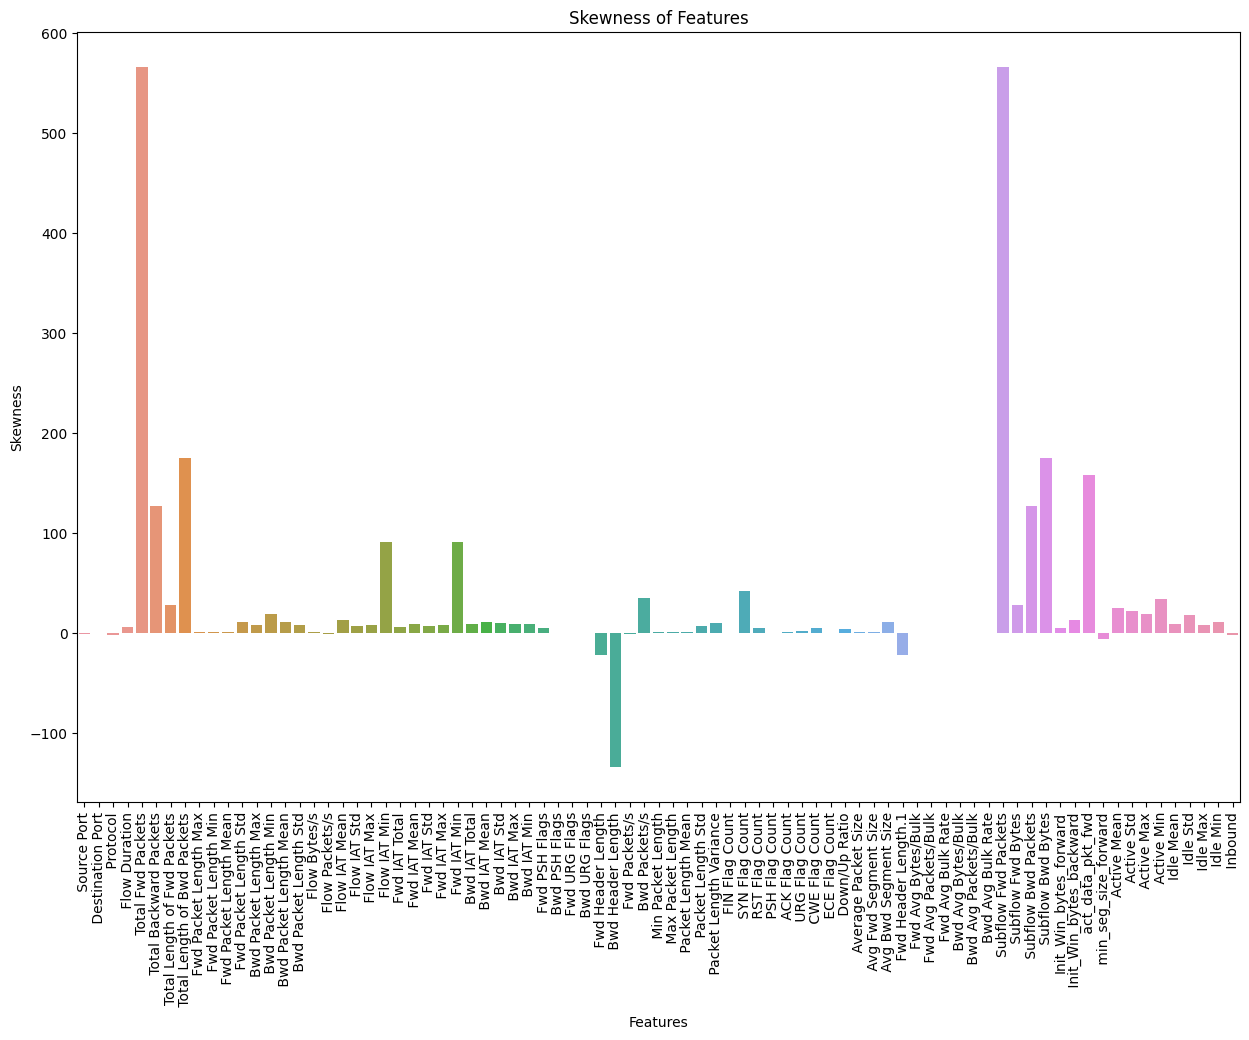

In [ ]:
#plot the sekwenss of the features
plt.figure(figsize=(15, 10))
sns.barplot(x=feature_skewness.index, y=feature_skewness.values)
plt.xticks(rotation=90)  # Rotate labels for better readability if there are many features
plt.title('Skewness of Features')
plt.xlabel('Features')
plt.ylabel('Skewness')
plt.show()

## Distribution of Target Variable

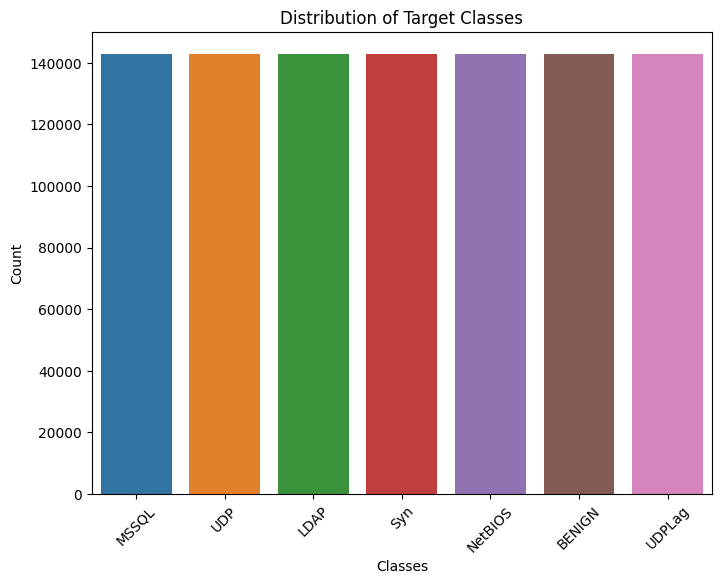

In [ ]:
#plot the distrbution of samples across the different classes
label_counts = new_data[' Label'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.title('Distribution of Target Classes')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

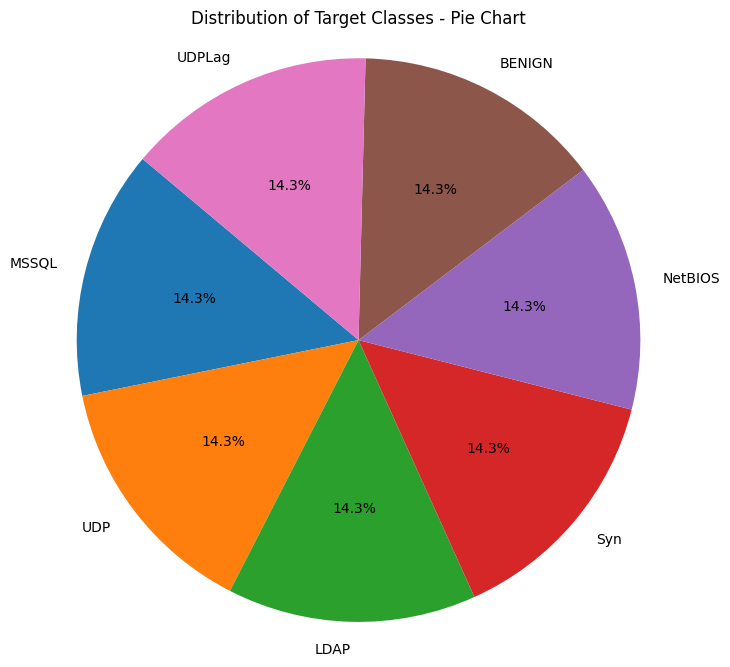

In [ ]:
# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Target Classes - Pie Chart')
plt.axis('equal')
plt.show()

# Feature Engineering

## Label encoding for categorical features and target

In [ ]:
#converting categorial columns into numerical columns
for column in ['Flow ID', ' Source IP', ' Destination IP', ' Timestamp']:
    data_X[column] = LabelEncoder().fit_transform(data_X[column])

data_y_trans = LabelEncoder().fit_transform(data_y)

<ipython-input-17-fabd46f90630>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  feature_importances = feature_importances.append(importances, ignore_index=True)
<ipython-input-17-fabd46f90630>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  feature_importances = feature_importances.append(importances, ignore_index=True)
<ipython-input-17-fabd46f90630>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  feature_importances = feature_importances.append(importances, ignore_index=True)
<ipython-input-17-fabd46f90630>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  feature_importances = feature_importances.append(importances, ignore_inde

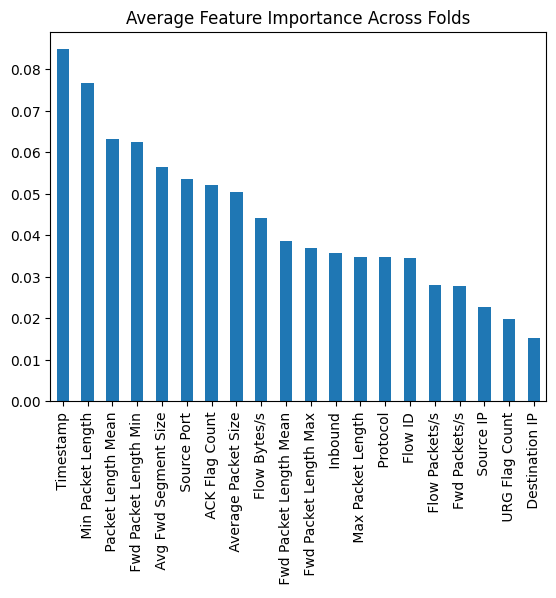

In [ ]:
# Initialize ExtraTreesClassifier
model = ExtraTreesClassifier(random_state=42)

# Cross-validation setup
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)
feature_importances = pd.DataFrame(index=data_X.columns)

# Calculate feature importances across folds
for train_index, test_index in rskf.split(data_X, data_y_trans):
    X_train_fold, X_test_fold = data_X.iloc[train_index], data_X.iloc[test_index]
    y_train_fold, y_test_fold = data_y_trans[train_index], data_y_trans[test_index]
    model.fit(X_train_fold, y_train_fold)
    importances = pd.Series(model.feature_importances_, index=X_train_fold.columns)
    feature_importances = feature_importances.append(importances, ignore_index=True)

# Calculate average feature importances and select top 20
avg_importances = feature_importances.mean().nlargest(20)

avg_importances.plot(kind='bar', title='Average Feature Importance Across Folds')
plt.show()

# Modeling

In [ ]:
# Select top 20 features for model training
data_X_top = data_X[avg_importances.index]

X_train, X_test, y_train, y_test = train_test_split(data_X_top, data_y_trans, test_size=0.3, random_state=42)

In [ ]:
ss = StandardScaler()
X_train_std = ss.fit_transform(X_train)
X_test_std = ss.transform(X_test)

In [ ]:
classifiers = {
    "SVM": LinearSVC(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100),
    "Random Forest": RandomForestClassifier(),
    "Bagging": BaggingClassifier(base_estimator=DecisionTreeClassifier()),
}

In [ ]:
# Storage for metrics
model_performance = {
    "Classifier": [],
    "Accuracy": [],
    "F1 Score": []
}

In [ ]:
# Function to plot ROC Curve
def plot_roc_curve(classifier, X_val, y_val, title):
    y_test_cat = to_categorical(y_val)
    n_classes = y_test_cat.shape[1]
    lw = 2
    pred_proba = classifier.predict_proba(X_val) if hasattr(classifier, "predict_proba") else classifier.decision_function(X_val)
    y_score = pred_proba

    fpr, tpr, roc_auc = {}, {}, {}
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_cat[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_cat.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    plt.figure(figsize=(10, 6))
    plt.plot(fpr["micro"], tpr["micro"], label='Micro-average ROC (area = {0:0.2f})'.format(roc_auc["micro"]), color='deeppink', linestyle=':', linewidth=4)

    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], lw=lw, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
# Function to plot Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, class_names, title):
    matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(matrix, annot=True, fmt='d', linewidths=.5, cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title(title)
    plt.show()

In [1]:
### comparative visualizations of classifiers by f1 score and accuracy plot 
def plot_performance(metric):
    plt.figure(figsize=(10, 6))
    barplot = sns.barplot(x="Classifier", y=metric, data=model_performance)
    plt.title(f'Comparative {metric} of Classifiers')
    plt.ylabel(metric)
    plt.xlabel('Classifier')
    plt.xticks(rotation=45)

    # Annotate each bar with the value
    for p in barplot.patches:
        barplot.annotate(format(p.get_height(), '.2f'),
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha = 'center', va = 'center',
                         xytext = (0, 9),
                         textcoords = 'offset points')

    plt.show()

### Training models

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


--- SVM Classification Report ---
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     42916
           1       0.99      1.00      0.99     42699
           2       0.95      0.98      0.97     42800
           3       1.00      1.00      1.00     42938
           4       0.97      1.00      0.98     42585
           5       0.97      0.86      0.91     43126
           6       0.90      0.91      0.90     42936

    accuracy                           0.96    300000
   macro avg       0.96      0.96      0.96    300000
weighted avg       0.96      0.96      0.96    300000



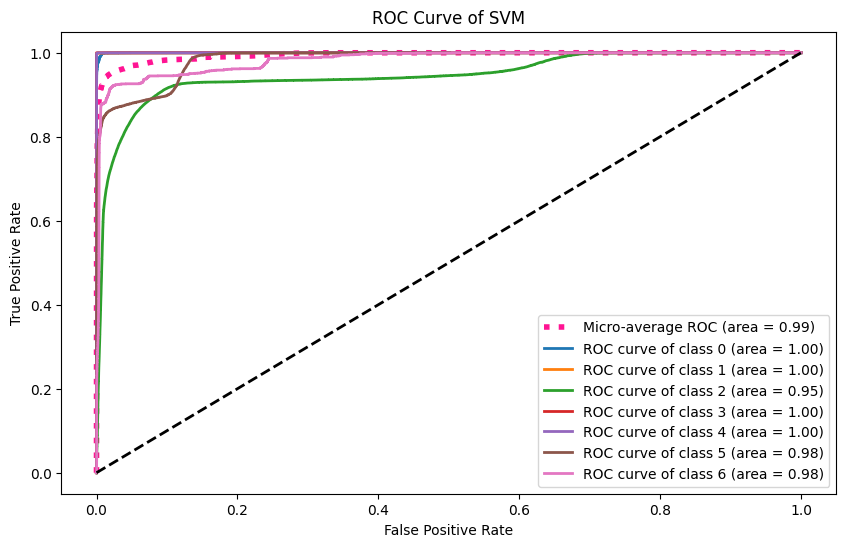

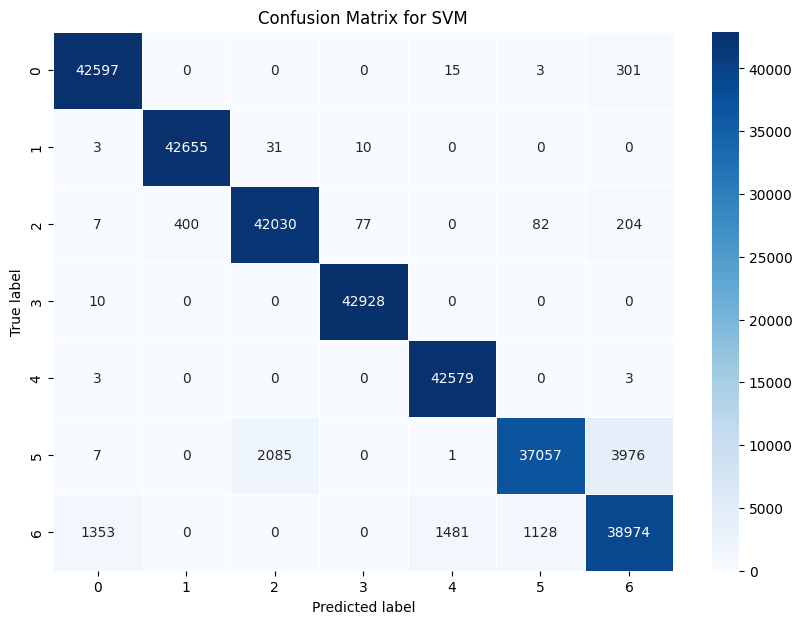

--- Logistic Regression Classification Report ---
              precision    recall  f1-score   support

           0       0.99      0.98      0.98     42916
           1       1.00      1.00      1.00     42699
           2       0.99      1.00      1.00     42800
           3       1.00      1.00      1.00     42938
           4       0.99      1.00      0.99     42585
           5       0.99      0.97      0.98     43126
           6       0.96      0.97      0.97     42936

    accuracy                           0.99    300000
   macro avg       0.99      0.99      0.99    300000
weighted avg       0.99      0.99      0.99    300000



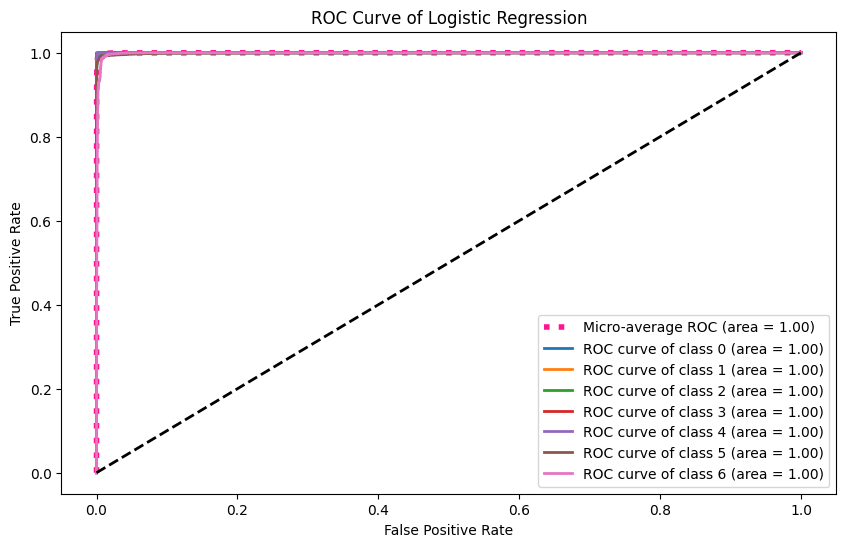

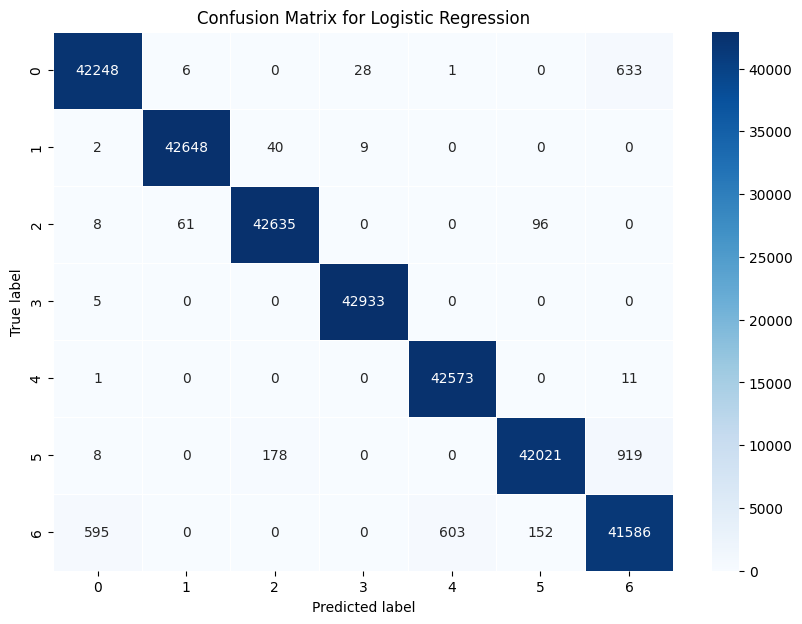

--- Gradient Boosting Classification Report ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42916
           1       1.00      1.00      1.00     42699
           2       1.00      1.00      1.00     42800
           3       1.00      1.00      1.00     42938
           4       1.00      1.00      1.00     42585
           5       1.00      1.00      1.00     43126
           6       1.00      1.00      1.00     42936

    accuracy                           1.00    300000
   macro avg       1.00      1.00      1.00    300000
weighted avg       1.00      1.00      1.00    300000



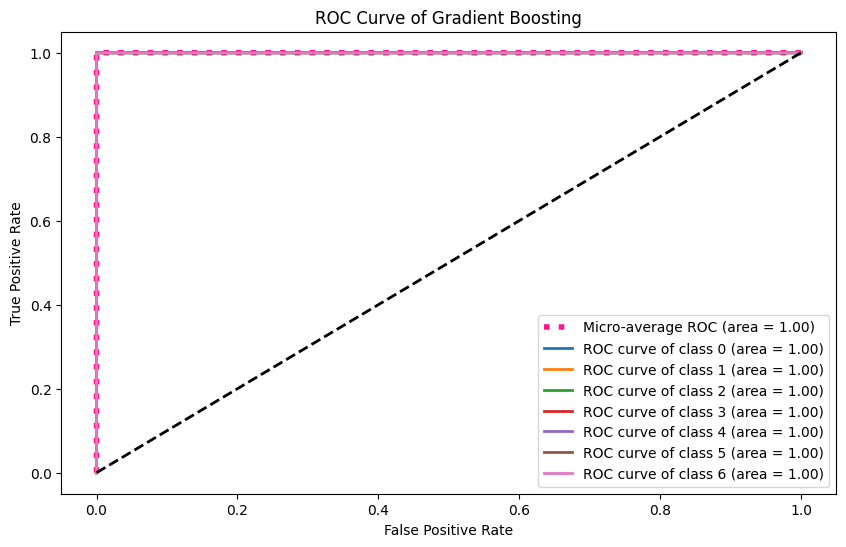

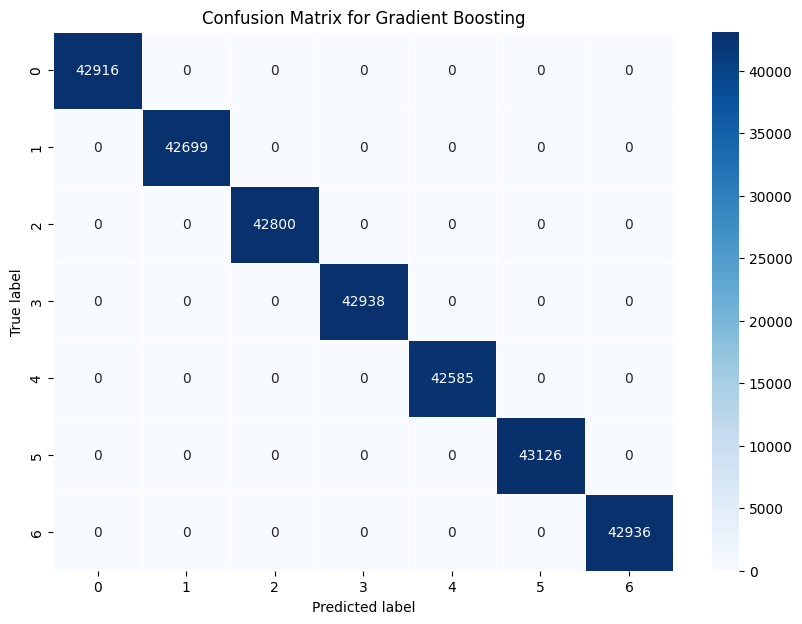

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


--- AdaBoost Classification Report ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42916
           1       1.00      1.00      1.00     42699
           2       1.00      1.00      1.00     42800
           3       1.00      1.00      1.00     42938
           4       1.00      1.00      1.00     42585
           5       1.00      1.00      1.00     43126
           6       1.00      1.00      1.00     42936

    accuracy                           1.00    300000
   macro avg       1.00      1.00      1.00    300000
weighted avg       1.00      1.00      1.00    300000



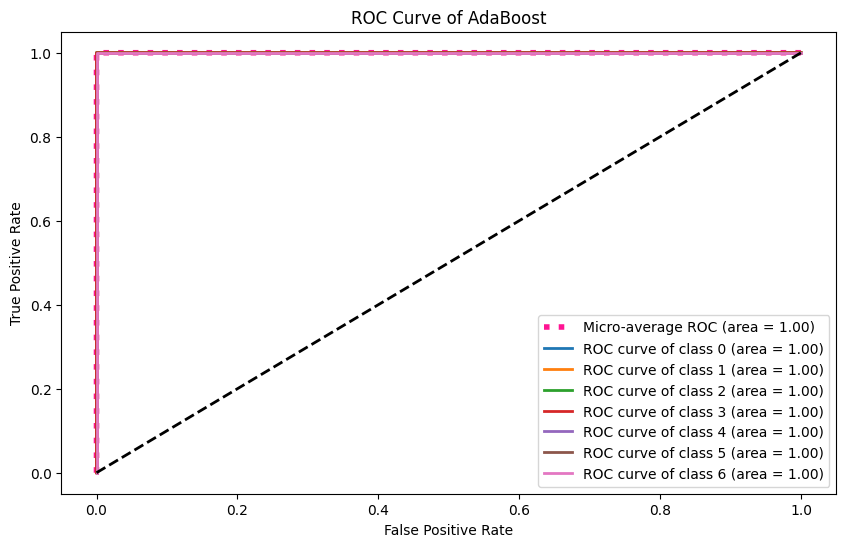

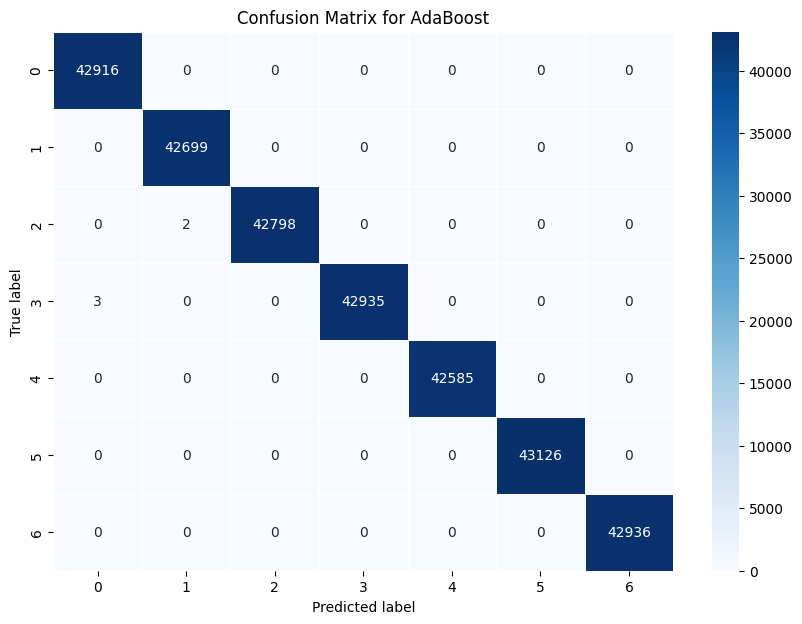

--- Random Forest Classification Report ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42916
           1       1.00      1.00      1.00     42699
           2       1.00      1.00      1.00     42800
           3       1.00      1.00      1.00     42938
           4       1.00      1.00      1.00     42585
           5       1.00      1.00      1.00     43126
           6       1.00      1.00      1.00     42936

    accuracy                           1.00    300000
   macro avg       1.00      1.00      1.00    300000
weighted avg       1.00      1.00      1.00    300000



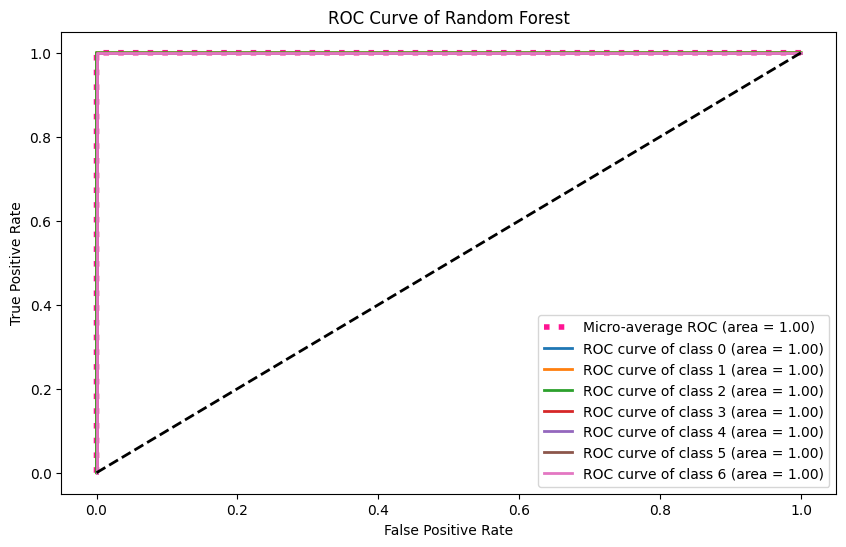

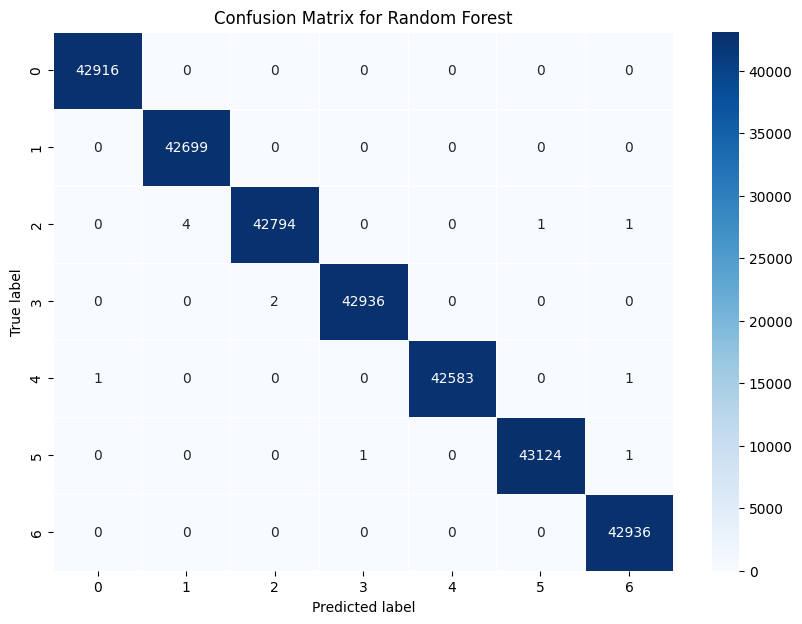

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


--- Bagging Classification Report ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42916
           1       1.00      1.00      1.00     42699
           2       1.00      1.00      1.00     42800
           3       1.00      1.00      1.00     42938
           4       1.00      1.00      1.00     42585
           5       1.00      1.00      1.00     43126
           6       1.00      1.00      1.00     42936

    accuracy                           1.00    300000
   macro avg       1.00      1.00      1.00    300000
weighted avg       1.00      1.00      1.00    300000



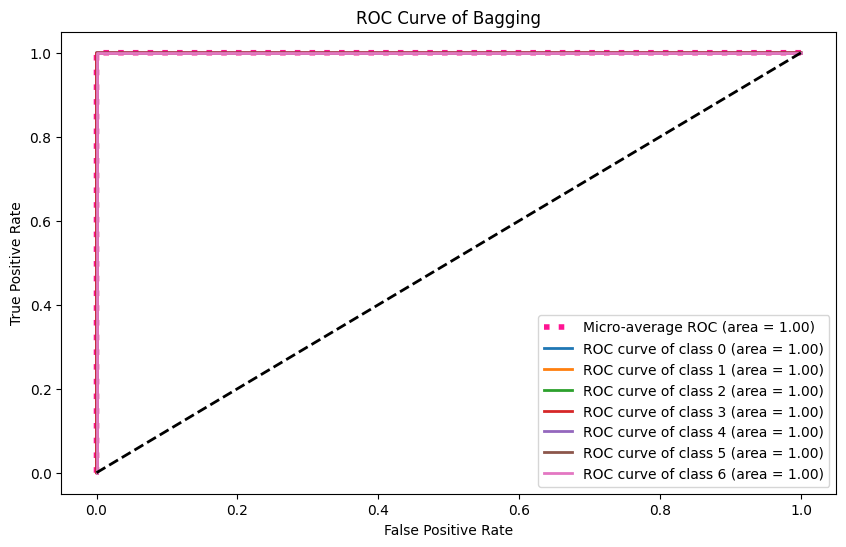

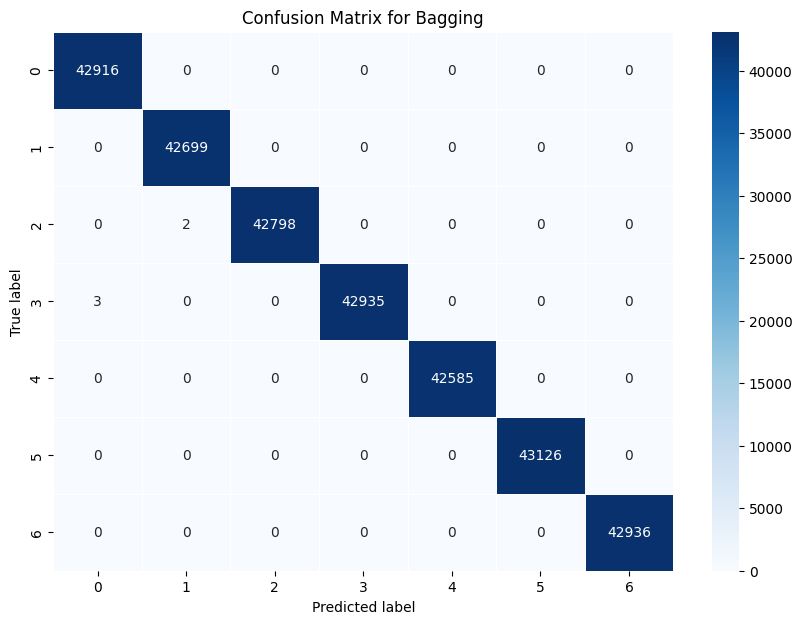

In [ ]:
# Get unique class names from the target array
class_names = np.unique(y_test)

# Training, predictions, and evaluation
for name, clf in classifiers.items():
    clf.fit(X_train_std, y_train)
    y_pred = clf.predict(X_test_std)

    # Store performance metrics
    model_performance["Classifier"].append(name)
    model_performance["Accuracy"].append(accuracy_score(y_test, y_pred))
    model_performance["F1 Score"].append(f1_score(y_test, y_pred, average='macro'))

    # Classification Report
    print(f"--- {name} Classification Report ---")
    print(classification_report(y_test, y_pred))

    # ROC Curve Plotting
    if hasattr(clf, "predict_proba") or hasattr(clf, "decision_function"):
        plot_roc_curve(clf, X_test_std, y_test, f'ROC Curve of {name}')

    # Confusion Matrix Plotting
    plot_confusion_matrix(y_test, y_pred, class_names, f'Confusion Matrix for {name}')

### Observe the performance of each model 

In [ ]:
performance_df = pd.DataFrame(model_performance)
display(performance_df)

,Classifier,Accuracy,F1 Score
0,SVM,0.962733,0.962335
1,Logistic Regression,0.988813,0.988827
2,Gradient Boosting,1.000000,1.000000
3,AdaBoost,0.999983,0.999983
4,Random Forest,0.999960,0.999960
5,Bagging,0.999983,0.999983


|index|Classifier|Accuracy|F1 Score|
|---|---|---|---|
|0|SVM|0\.9627333333333333|0\.9623350729363827|
|1|Logistic Regression|0\.9888133333333333|0\.9888271085900552|
|2|Gradient Boosting|1\.0|1\.0|
|3|AdaBoost|0\.9999833333333333|0\.9999833328107509|
|4|Random Forest|0\.99996|0\.9999599879497183|
|5|Bagging|0\.9999833333333333|0\.9999833328107509|

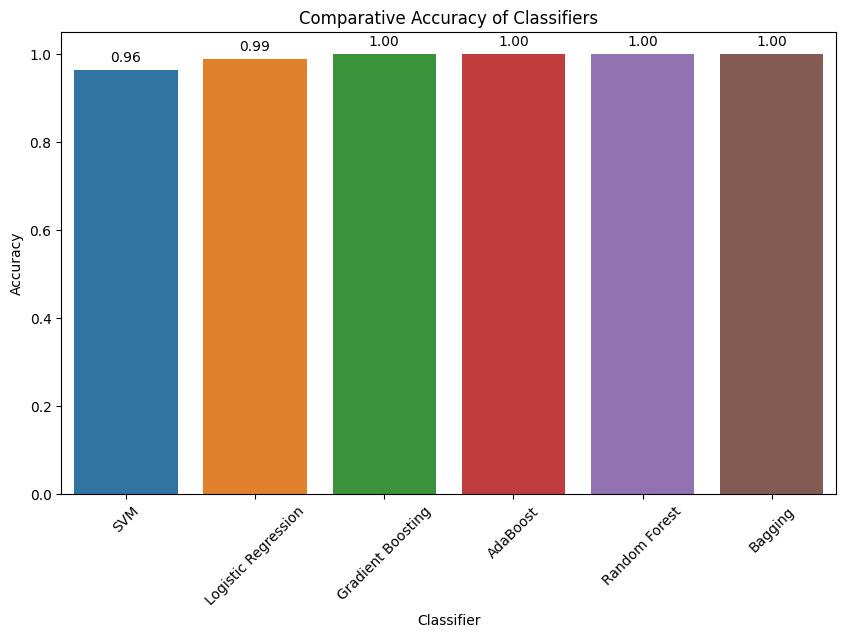

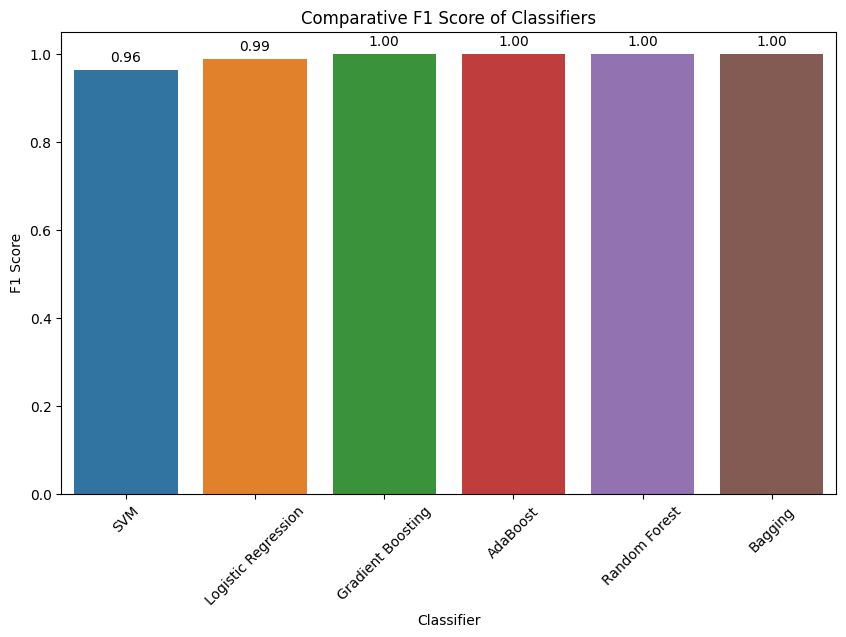

In [ ]:
# Plot Accuracy and F1 Score Comparisons
plot_performance("Accuracy")
plot_performance("F1 Score")

### fine-tuned the models through applied cross-validation

This ensures that the models not only fit the training data well but also generalize effectively to new and unseen data

In [ ]:
# Number of folds
num_folds = 5

# Cross-validation
cv_scores = {}
for name, clf in classifiers.items():
    scores = cross_val_score(clf, X_train_std, y_train, cv=num_folds, scoring='accuracy')
    cv_scores[name] = {"Mean Accuracy": np.mean(scores), "Standard Deviation": np.std(scores)}

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will b

In [ ]:
# Display the cross-validation scores
cv_df = pd.DataFrame(cv_scores).transpose()
print(cv_df)

                     Mean Accuracy  Standard Deviation
SVM                       0.962943            0.000567
Logistic Regression       0.987687            0.000314
Gradient Boosting         0.999994            0.000003
AdaBoost                  0.999987            0.000008
Random Forest             0.999946            0.000015
Bagging                   0.999989            0.000006


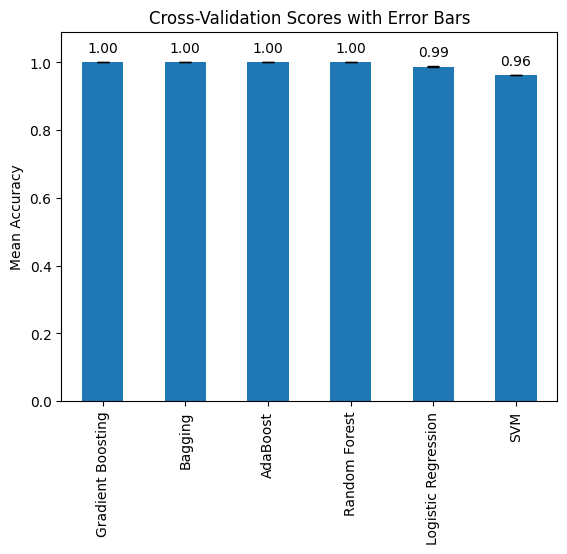

In [ ]:
# Visualize the cross-validation scores
ax = cv_df.sort_values(by="Mean Accuracy", ascending=False).plot(kind='bar', y='Mean Accuracy', yerr='Standard Deviation', legend=False, capsize=4)
plt.title('Cross-Validation Scores with Error Bars')
plt.ylabel('Mean Accuracy')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')
upper_limit = cv_df['Mean Accuracy'].max() + cv_df['Standard Deviation'].max() + 0.09
plt.ylim(0, upper_limit)

plt.show()

### Using Majority Voting Technique for Ensemble classification

In [ ]:
class MajorityVoteClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, classifiers, vote='classlabel', weights=None):
        self.classifiers = classifiers
        self.named_classifiers = {key: value for key, value in _name_estimators(classifiers)}
        self.vote = vote
        self.weights = weights

    def fit(self, X, y):
        """ Fit classifiers.

        Parameters
        ----------
        X : {array-like, sparse matrix},
            shape = [n_examples, n_features]
            Matrix of training examples.

        y : array-like, shape = [n_examples]
            Vector of target class labels.

        Returns
        -------
        self : object

        """
        if self.vote not in ('probability', 'classlabel'):
            raise ValueError("vote must be 'probability'"
                             "or 'classlabel'; got (vote=%r)"
                             % self.vote)
        if self.weights and len(self.weights) != len(self.classifiers):
          raise ValueError("Number of classifiers and weights"
                             "must be equal; got %d weights,"
                             "%d classifiers"
                             % (len(self.weights),
                             len(self.classifiers)))
        # Use LabelEncoder to ensure class labels start
        # with 0, which is important for np.argmax
        # call in self.predict
        self.lablenc_ = LabelEncoder()
        self.lablenc_.fit(y)
        self.classes_ = self.lablenc_.classes_
        self.classifiers_ = []
        for clf in self.classifiers:
            fitted_clf = clone(clf).fit(X,
                               self.lablenc_.transform(y))
            self.classifiers_.append(fitted_clf)
        return self
    def predict(self, X):

        """ Predict class labels for X.

        Parameters
        ----------
        X : {array-like, sparse matrix},
            Shape = [n_examples, n_features]
            Matrix of training examples.

        Returns
        ----------
        maj_vote : array-like, shape = [n_examples]
            Predicted class labels.

        """
        if self.vote == 'probability':
            maj_vote = np.argmax(self.predict_proba(X), axis=1)
        else: # 'classlabel' vote

            # Collect results from clf.predict calls
            predictions = np.asarray([clf.predict(X)
                                      for clf in
                                      self.classifiers_]).T

            maj_vote = np.apply_along_axis(lambda x: np.argmax(
                                           np.bincount(x,
                                           weights=self.weights)),
                                           axis=1,
                                           arr=predictions)
        maj_vote = self.lablenc_.inverse_transform(maj_vote)
        return maj_vote

    def predict_proba(self, X):
        """ Predict class probabilities for X.

        Parameters
        ----------
        X : {array-like, sparse matrix},
            shape = [n_examples, n_features]
            Training vectors, where
            n_examples is the number of examples and
            n_features is the number of features.

        Returns
        ----------
        avg_proba : array-like,
            shape = [n_examples, n_classes]
            Weighted average probability for
            each class per example.

        """
        probas = np.asarray([clf.predict_proba(X)
                             for clf in self.classifiers_])
        avg_proba = np.average(probas, axis=0,
                               weights=self.weights)
        return avg_proba

    def get_params(self, deep=True):
        """ Get classifier parameter names for GridSearch"""
        if not deep:
            return super(MajorityVoteClassifier,
                           self).get_params(deep=False)
        else:
            out = self.named_classifiers.copy()
            for name, step in self.named_classifiers.items():
                for key, value in step.get_params(
                        deep=True).items():
                    out['%s__%s' % (name, key)] = value
            return out

In [ ]:
# Initialize MajorityVoteClassifier with the classifiers
mv_clf = MajorityVoteClassifier(classifiers=[clf for _, clf in classifiers.items()])
mv_clf.fit(X_train_std, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


MajorityVoteClassifier(classifiers=[LinearSVC(),
                                    LogisticRegression(max_iter=1000),
                                    GradientBoostingClassifier(),
                                    AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),
                                                       n_estimators=100),
                                    RandomForestClassifier(),
                                    BaggingClassifier(base_estimator=DecisionTreeClassifier())])

Accuracy Score for Majority Voting: 0.9999933333333333
F1 Score for Majority Voting: 0.9999933165377657


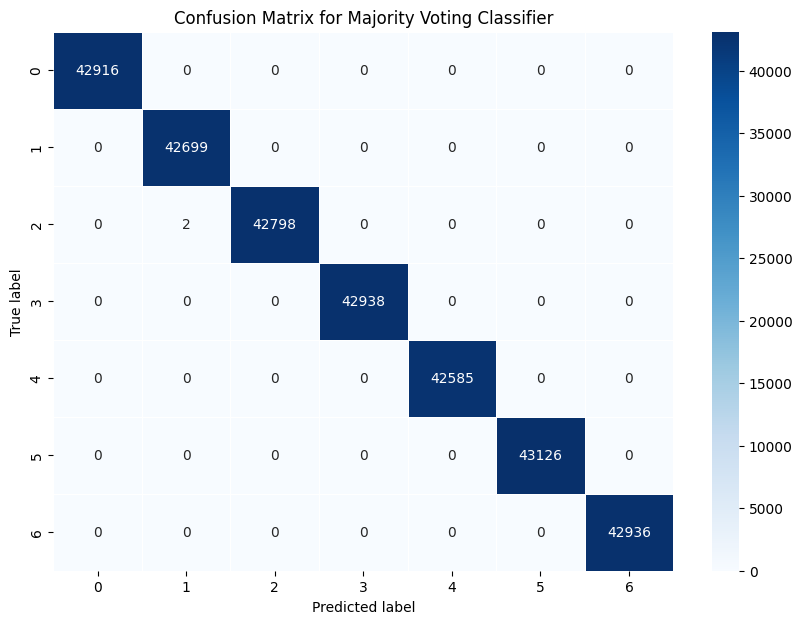

In [ ]:
y_pred_mjv = mv_clf.predict(X_test_std)
accuracy_mv = accuracy_score(y_test, y_pred_mjv)
f1_score_mv = f1_score(y_test, y_pred_mjv, average='macro')
print("Accuracy Score for Majority Voting:", accuracy_mv)
print("F1 Score for Majority Voting:", f1_score_mv)
# Now call the function to plot the confusion matrix
plot_confusion_matrix(y_test, y_pred_mjv, class_names, 'Confusion Matrix for Majority Voting Classifier')

In [ ]:
# Compute Accuracy and F1 scores for each individual classifier
accuracies = {name: accuracy_score(y_test, clf.predict(X_test_std)) for name, clf in classifiers.items()}
f1_scores = {name: f1_score(y_test, clf.predict(X_test_std), average='macro') for name, clf in classifiers.items()}

# Add Majority Voting classifier's scores
accuracies["Majority Voting"] = accuracy_mv
f1_scores["Majority Voting"] = f1_score_mv

### Comparison of F1 Scores for Different Models

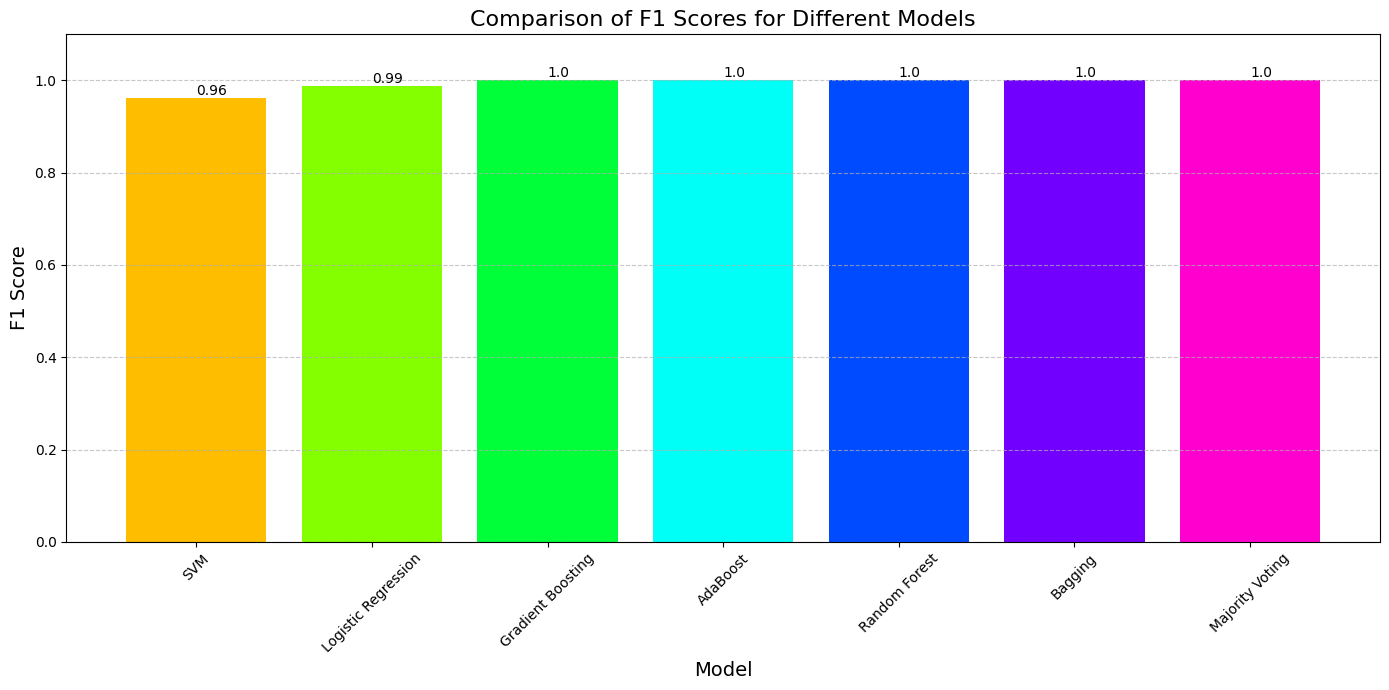

In [ ]:
plt.figure(figsize=(14, 7))
plt.bar(f1_scores.keys(), f1_scores.values(), color=sns.color_palette("hsv", len(f1_scores)))
for bar in plt.bar(f1_scores.keys(), f1_scores.values(), color=sns.color_palette("hsv", len(f1_scores))):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 2), va='bottom')
plt.title('Comparison of F1 Scores for Different Models', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('F1 Score', fontsize=14)
plt.xticks(rotation=45)
plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()